In [ ]:
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 1.6 MB/s eta 0:00:00


In [1]:
import pandas as pd
import json
from sqlalchemy import create_engine
import psycopg2
from mplsoccer import VerticalPitch,Pitch
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

import os

In [ ]:
#from google.colab import drive, files
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Portfolio/

/content/drive/MyDrive/Portfolio


# Automation

In [2]:
mu_events = pd.read_csv('Manchester United Events 2023-2024 Preprocessed.csv',index_col=0)
mu_events

C:\Users\MSI\AppData\Local\Temp\ipykernel_13544\95259618.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  mu_events = pd.read_csv('Manchester United Events 2023-2024 Preprocessed.csv',index_col=0)


,id,event_id,minute,second,team_id,x,y,expanded_minute,satisfied_events_types,is_touch,period_value,period_display_name,type_value,type_display_name,outcome_type_value,outcome_type_display_name,player_id,end_x,end_y,related_event_id,related_player_id,blocked_x,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,card_type_value,cardType.displayName,is_goal,match_id,is_own_goal,player_name,Blocked,SavedOffline,KeeperThrow,KeeperSaveInSixYard,DeepBoxRight,PlayerPosition,Hands,KeeperMissed,BlockedY,LowLeft,Offensive,RelatedEventId,OtherBodyPart,GoalKick,Zone,OppositeRelatedEvent,LayOff,Assisted,IntentionalAssist,JerseyNumber,VoidYellowCard,ThirtyFivePlusCentre,BlockedX,HighLeft,KeeperSaved,MissRight,FromShotOffTarget,Longball,TeamPlayerFormation,BoxCentre,SetPiece,AerialFoul,GoalMouthZ,ParriedSafe,SixYardBlock,IntentionalGoalAssist,Cross,RegularPlay,DeepBoxLeft,DivingSave,HeadPass,FirstTouch,KeeperSaveInTheBox,Collected,InvolvedPlayers,LeftFoot,LowRight,Penalty,CornerTaken,OutfielderBlock,LastMan,Volley,OutOfBoxCentre,OutOfBoxRight,HighRight,OwnGoal,Head,MissHigh,FastBreak,GoalMouthY,Foul,RightFoot,DirectFreekick,PenaltyShootoutConcededGK,Angle,Defensive,ThrowinSetPiece,OutOfBoxDeepRight,BoxLeft,IndividualPlay,SmallBoxRight,FormationSlot,Red,FreekickTaken,SmallBoxLeft,Chipped,StandingSave,HighClaim,ShotAssist,KeeperWentWide,BigChance,Yellow,OutOfBoxDeepLeft,IndirectFreekickTaken,GoalDisallowed,BlockedCross,HighCentre,OverRun,ThirtyFivePlusLeft,KeyPass,LeadingToGoal,PassEndY,BigChanceCreated,Length,BoxRight,PassEndX,LowCentre,KeeperSaveObox,MissLeft,OneOnOne,TeamFormation,ParriedDanger,ThrowIn,SecondYellow,CaptainPlayerId,LeadingToAttempt,Throughball,SmallBoxCentre,PlayerCaughtOffside,Feet,FromCorner,pass_recipient_name,pass_recipient_id
0,2.577368e+09,2,0,0.0,32,0.0,0.0,0,[],False,1,FirstHalf,32,Start,1,Successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.577368e+09,3,0,0.0,32,49.9,49.9,0,"[91, 117, 30, 35, 37, 216, 218]",True,1,FirstHalf,1,Pass,1,Successful,123761.0,37.0,50.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Bruno Fernandes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.1,NaN,13.5,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casemiro,88526.0
2,2.577368e+09,4,0,2.0,32,37.0,50.1,0,"[91, 117, 30, 35, 37, 216, 218]",True,1,FirstHalf,1,Pass,1,Successful,88526.0,35.7,83.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Casemiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.4,NaN,22.7,NaN,35.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Luke Shaw,118244.0
3,2.577368e+09,5,0,3.0,32,35.7,83.6,0,"[91, 117, 30, 35, 38, 215, 218]",True,1,FirstHalf,1,Pass,1,Successful,118244.0,29.7,67.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Luke Shaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
mu_events.pass_recipient_name.unique()

array([nan, 'Casemiro', 'Luke Shaw', 'Lisandro Martínez', 'André Onana',
       'Aaron Wan-Bissaka', 'Raphaël Varane', 'Mason Mount',
       'Alejandro Garnacho', 'Bruno Fernandes', 'Antony',
       'Marcus Rashford', 'Victor Lindelöf', 'Christian Eriksen',
       'Jadon Sancho', 'Facundo Pellistri', 'Scott McTominay',
       'Diogo Dalot', 'Anthony Martial', 'Harry Maguire',
       'Rasmus Højlund', 'Jonny Evans', 'Sergio Reguilón',
       'Hannibal Mejbri', 'Sofyan Amrabat', 'Daniel Gore',
       'Donny van de Beek', 'Kobbie Mainoo', 'Willy Kambwala',
       'Amad Diallo', 'Omari Forson', 'Altay Bayindir', 'Ethan Wheatley'],
      dtype=object)

In [ ]:
mu_events.player_name.unique()

array([nan, 'Bruno Fernandes', 'Casemiro', 'Luke Shaw',
       'Lisandro Martínez', 'André Onana', 'Aaron Wan-Bissaka',
       'Raphaël Varane', 'Mason Mount', 'Alejandro Garnacho', 'Antony',
       'Marcus Rashford', 'Victor Lindelöf', 'Christian Eriksen',
       'Jadon Sancho', 'Facundo Pellistri', 'Scott McTominay',
       'Diogo Dalot', 'Anthony Martial', 'Rasmus Højlund',
       'Harry Maguire', 'Jonny Evans', 'Sergio Reguilón',
       'Hannibal Mejbri', 'Sofyan Amrabat', 'Daniel Gore',
       'Donny van de Beek', 'Kobbie Mainoo', 'Willy Kambwala',
       'Amad Diallo', 'Omari Forson', 'Altay Bayindir', 'Ethan Wheatley'],
      dtype=object)

In [3]:
playerName = 'Marcus Rashford'

In [ ]:
mu_events.type_display_name.unique()

array(['Start', 'Pass', 'Tackle', 'BallRecovery', 'TakeOn', 'Save',
       'Foul', 'BallTouch', 'Challenge', 'BlockedPass', 'Aerial',
       'CornerAwarded', 'Dispossessed', 'Clearance', 'SavedShot',
       'Interception', 'Card', 'KeeperPickup', 'OffsideProvoked',
       'MissedShots', 'End', 'SubstitutionOff', 'SubstitutionOn',
       'KeeperSweeper', 'Goal', 'OffsideGiven', 'OffsidePass', 'Claim',
       'CrossNotClaimed', 'FormationSet', 'GoodSkill', 'ShotOnPost',
       'FormationChange', 'ShieldBallOpp', 'Punch', 'ChanceMissed',
       'Smother', 'Error', 'PenaltyFaced'], dtype=object)

In [ ]:
mu_events.loc[mu_events.index==46]

,id,event_id,minute,second,team_id,x,y,expanded_minute,satisfied_events_types,is_touch,period_value,period_display_name,type_value,type_display_name,outcome_type_value,outcome_type_display_name,player_id,end_x,end_y,related_event_id,related_player_id,blocked_x,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,card_type_value,cardType.displayName,is_goal,match_id,is_own_goal,player_name,Cross,JerseyNumber,RelatedEventId,Offensive,Throughball,LeadingToAttempt,KeyPass,IndirectFreekickTaken,LowCentre,TeamFormation,IntentionalGoalAssist,GoalMouthY,OutOfBoxDeepRight,VoidYellowCard,MissLeft,Assisted,OneOnOne,FormationSlot,PenaltyShootoutConcededGK,Volley,BigChance,FromShotOffTarget,OtherBodyPart,DeepBoxLeft,BoxLeft,FreekickTaken,Chipped,PlayerPosition,KeeperThrow,DeepBoxRight,StandingSave,Feet,Longball,CornerTaken,FastBreak,KeeperWentWide,BlockedY,HighRight,RegularPlay,KeeperSaveInSixYard,Penalty,Head,OutfielderBlock,KeeperMissed,PassEndX,MissHigh,HeadPass,PassEndY,BlockedX,KeeperSaved,SmallBoxRight,Blocked,IntentionalAssist,BoxCentre,Defensive,OutOfBoxCentre,Foul,BigChanceCreated,LayOff,ThrowIn,Collected,BoxRight,OutOfBoxDeepLeft,FirstTouch,Red,GoalKick,ShotAssist,GoalMouthZ,Hands,HighLeft,KeeperSaveInTheBox,Length,ParriedSafe,ThirtyFivePlusCentre,SmallBoxCentre,SavedOffline,PlayerCaughtOffside,BlockedCross,LowRight,LeftFoot,Yellow,SecondYellow,RightFoot,OutOfBoxRight,OppositeRelatedEvent,OwnGoal,KeeperSaveObox,LastMan,HighCentre,ParriedDanger,HighClaim,SetPiece,Zone,FromCorner,SmallBoxLeft,AerialFoul,OverRun,LowLeft,ThirtyFivePlusLeft,DirectFreekick,Angle,MissRight,DivingSave,ThrowinSetPiece,GoalDisallowed,CaptainPlayerId,TeamPlayerFormation,SixYardBlock,InvolvedPlayers,LeadingToGoal,IndividualPlay,pass_recipient_name,pass_recipient_id
46,2.577369e+09,52,3,36.0,32,44.8,92.9,3,"[91, 119, 117, 30, 36, 38, 216, 218]",True,1,FirstHalf,1,Pass,1,Successful,343346.0,53.2,79.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Mason Mount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.2,NaN,NaN,79.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casemiro,88526.0


In [ ]:
mu_events.loc[mu_events.type_display_name=='BallTouch']

,id,event_id,minute,second,team_id,x,y,expanded_minute,satisfied_events_types,is_touch,period_value,period_display_name,type_value,type_display_name,outcome_type_value,outcome_type_display_name,player_id,end_x,end_y,related_event_id,related_player_id,blocked_x,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,card_type_value,cardType.displayName,is_goal,match_id,is_own_goal,player_name,Cross,JerseyNumber,RelatedEventId,Offensive,Throughball,LeadingToAttempt,KeyPass,IndirectFreekickTaken,LowCentre,TeamFormation,IntentionalGoalAssist,GoalMouthY,OutOfBoxDeepRight,VoidYellowCard,MissLeft,Assisted,OneOnOne,FormationSlot,PenaltyShootoutConcededGK,Volley,BigChance,FromShotOffTarget,OtherBodyPart,DeepBoxLeft,BoxLeft,FreekickTaken,Chipped,PlayerPosition,KeeperThrow,DeepBoxRight,StandingSave,Feet,Longball,CornerTaken,FastBreak,KeeperWentWide,BlockedY,HighRight,RegularPlay,KeeperSaveInSixYard,Penalty,Head,OutfielderBlock,KeeperMissed,PassEndX,MissHigh,HeadPass,PassEndY,BlockedX,KeeperSaved,SmallBoxRight,Blocked,IntentionalAssist,BoxCentre,Defensive,OutOfBoxCentre,Foul,BigChanceCreated,LayOff,ThrowIn,Collected,BoxRight,OutOfBoxDeepLeft,FirstTouch,Red,GoalKick,ShotAssist,GoalMouthZ,Hands,HighLeft,KeeperSaveInTheBox,Length,ParriedSafe,ThirtyFivePlusCentre,SmallBoxCentre,SavedOffline,PlayerCaughtOffside,BlockedCross,LowRight,LeftFoot,Yellow,SecondYellow,RightFoot,OutOfBoxRight,OppositeRelatedEvent,OwnGoal,KeeperSaveObox,LastMan,HighCentre,ParriedDanger,HighClaim,SetPiece,Zone,FromCorner,SmallBoxLeft,AerialFoul,OverRun,LowLeft,ThirtyFivePlusLeft,DirectFreekick,Angle,MissRight,DivingSave,ThrowinSetPiece,GoalDisallowed,CaptainPlayerId,TeamPlayerFormation,SixYardBlock,InvolvedPlayers,LeadingToGoal,IndividualPlay,pass_recipient_name,pass_recipient_id
47,2.577369e+09,53,3,37.0,32,53.0,77.1,3,"[91, 69]",True,1,FirstHalf,61,BallTouch,0,Unsuccessful,437022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Alejandro Garnacho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,2.577370e+09,67,5,37.0,32,63.8,62.5,5,[91],True,1,FirstHalf,61,BallTouch,1,Successful,343346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Mason Mount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,2.577370e+09,71,6,4.0,32,81.8,64.9,6,"[91, 69]",True,1,FirstHalf,61,BallTouch,0,Unsuccessful,343346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Mason Mount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,2.577371e+09,93,9,36.0,32,19.8,73.4,9,[91],True,1,FirstHalf,61,BallTouch,1,Successful,340105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Lisandro Martínez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Classify progressive pass based on opta definition
# Progressive passes aim to capture this and are defined as “completed open-play passes in the attacking two-thirds of the pitch that move the ball at least 25% closer to the goal
def is_progressive_pass(row):
    pitch_length = 100  # Length of the pitch in meters
    goal_width = 7.32  # Standard goal width in meters
    attacking_two_thirds_start = pitch_length / 3  # 33.33 meters from the goal
    
    # Closest y position on the goal line
    closest_y_on_goal = min(max(row['y'], (50 - goal_width / 2)), (50 + goal_width / 2))
    closest_y_on_goal_end = min(max(row['end_y'], (50 - goal_width / 2)), (50 + goal_width / 2))
    
    # Calculate initial and final distances to the closest point on the goal line
    initial_distance_to_goal = ((pitch_length - row['x'])**2 + (closest_y_on_goal - row['y'])**2)**0.5
    final_distance_to_goal = ((pitch_length - row['end_x'])**2 + (closest_y_on_goal_end - row['end_y'])**2)**0.5
    
    return (row['x'] > attacking_two_thirds_start and 
            row['end_x'] > row['x'] and 
            final_distance_to_goal <= initial_distance_to_goal * 0.75)



## Plot Take On

Text(0.28, 0.63, '41.61% Success Rate')

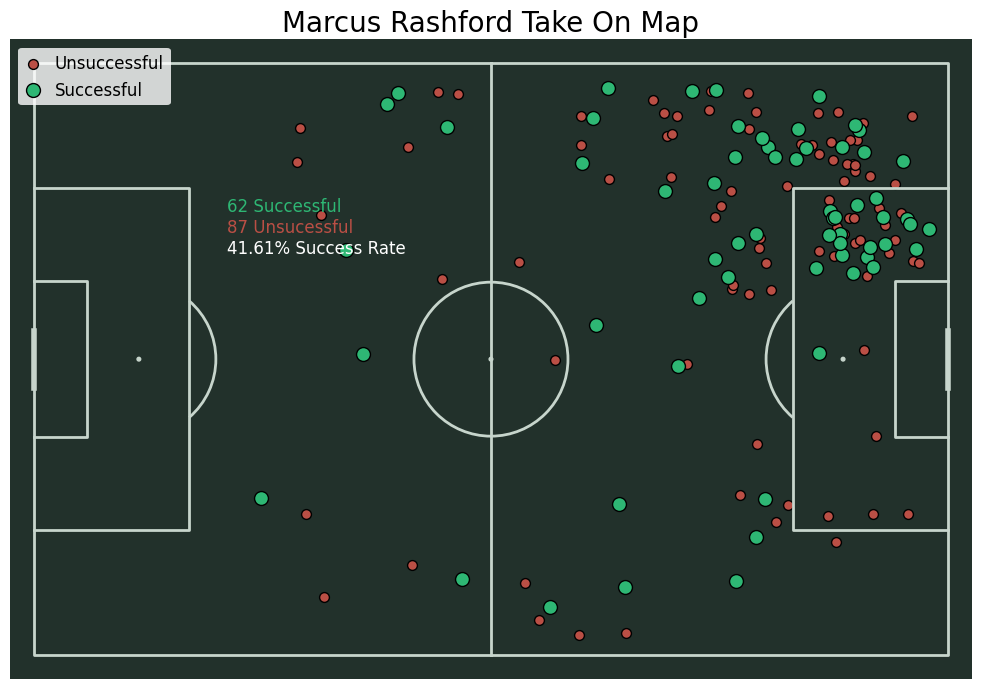

In [6]:
take_on_events = mu_events.loc[(mu_events.player_name==f'{playerName}')&(mu_events.type_display_name=='TakeOn')].reset_index(drop=True)
to_success = take_on_events.loc[take_on_events.outcome_type_display_name=='Successful']
to_fail = take_on_events.loc[take_on_events.outcome_type_display_name=='Unsuccessful']

# Set up the pitch
to_success_count = len(to_success.index)
to_fail_count = len(to_fail.index)
try:
    to_rate = round(to_success_count/(to_fail_count + to_success_count) *100,2)
except ZeroDivisionError:
    to_rate = 0
pitch = Pitch(pitch_type='opta', half=False, line_zorder=2,pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(12, 7))
#fig.set_facecolor('#22312b')

pitch.scatter(to_fail.x, to_fail.y, s=50, c = '#ba4f45', ax=ax,edgecolors="black",label='Unsuccessful')
pitch.scatter(to_success.x, to_success.y, s=100, c = '#2eb774', ax=ax,edgecolors="black",label='Successful')

# Set up the legend
ax.legend(facecolor='white', handlelength=1, edgecolor='None', fontsize=12, loc='upper left')

# Set the title
ax_title = ax.set_title(f'{playerName} Take On Map', fontsize=20)
fig.text(0.28, 0.69, f'{to_success_count} Successful', ha='left', va='baseline', fontsize=12, color='#2eb774')
fig.text(0.28, 0.66, f'{to_fail_count} Unsucessful', ha='left', va='baseline', fontsize=12, color='#ba4f45')
fig.text(0.28, 0.63, f'{to_rate}% Success Rate', ha='left', va='baseline', fontsize=12, color='white')
#ax.text(f'{len(progressive_pass_success.index)} Successful\n{len(progressive_pass_fail.index)} Unsuccessful')

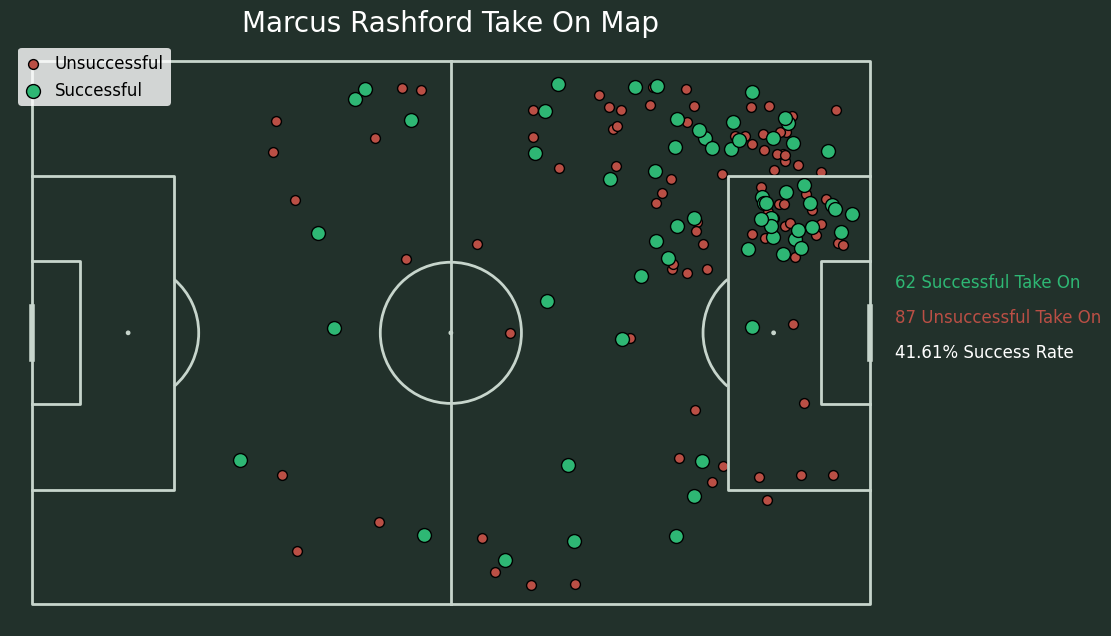

In [30]:
take_on_events = mu_events.loc[(mu_events.player_name==f'{playerName}')&(mu_events.type_display_name=='TakeOn')].reset_index(drop=True)
to_success = take_on_events.loc[take_on_events.outcome_type_display_name=='Successful']
to_fail = take_on_events.loc[take_on_events.outcome_type_display_name=='Unsuccessful']

# Count successful and unsuccessful take-ons
to_success_count = len(to_success.index)
to_fail_count = len(to_fail.index)
try:
    to_rate = round(to_success_count/(to_fail_count + to_success_count) * 100, 2)
except ZeroDivisionError:
    to_rate = 0

# Set up the pitch
pitch = Pitch(pitch_type='opta', half=False, line_zorder=2, pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(12, 7))
fig.set_facecolor('#22312b')
# Scatter plot for successful and unsuccessful take-ons
pitch.scatter(to_fail.x, to_fail.y, s=50, c='#ba4f45', ax=ax, edgecolors="black", label='Unsuccessful')
pitch.scatter(to_success.x, to_success.y, s=100, c='#2eb774', ax=ax, edgecolors="black", label='Successful')

# Set up the legend
ax.legend(facecolor='white', handlelength=1, edgecolor='None', fontsize=12, loc='upper left')

# Set the title
ax.set_title(f'{playerName} Take On Map', fontsize=20,color='white')

# Add text outside of the pitch
fig.text(0.87, 0.55, f'{to_success_count} Successful Take On', ha='left', va='center', fontsize=12, color='#2eb774')
fig.text(0.87, 0.5, f'{to_fail_count} Unsuccessful Take On', ha='left', va='center', fontsize=12, color='#ba4f45')
fig.text(0.87, 0.45, f'{to_rate}% Success Rate', ha='left', va='center', fontsize=12, color='white')

# Adjust layout to fit text
fig.tight_layout(pad=3)

plt.show()

## Plot Tackle

In [ ]:
tackle_events = mu_events.loc[(mu_events.player_name==f'{playerName}')&(mu_events.type_display_name=='Tackle')].reset_index(drop=True)
tackle_success = tackle_events.loc[tackle_events.outcome_type_display_name=='Successful']
tackle_fail = tackle_events.loc[tackle_events.outcome_type_display_name=='Unsuccessful']

# Set up the pitch
tackle_success_count = len(tackle_success.index)
tackle_fail_count = len(tackle_fail.index)
try:
    tackle_rate = round(tackle_success_count/(tackle_fail_count + tackle_success_count) *100,2)
except ZeroDivisionError:
    tackle_rate = 0
pitch = Pitch(pitch_type='opta', half=False, line_zorder=2,pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(12, 7))
#fig.set_facecolor('#22312b')

pitch.scatter(tackle_fail.x, tackle_fail.y, s=50, c = '#ba4f45', ax=ax,edgecolors="black",label='Unsuccessful')
pitch.scatter(tackle_success.x, tackle_success.y, s=100, c = '#2eb774', ax=ax,edgecolors="black",label='Successful')

# Set up the legend
ax.legend(facecolor='white', handlelength=1, edgecolor='None', fontsize=12, loc='upper left')

# Set the title
ax_title = ax.set_title(f'{playerName} Tackle Map', fontsize=20)
fig.text(0.28, 0.69, f'{tackle_success_count} Successful', ha='left', va='baseline', fontsize=12, color='#2eb774')
fig.text(0.28, 0.66, f'{tackle_fail_count} Unsucessful', ha='left', va='baseline', fontsize=12, color='#ba4f45')
fig.text(0.28, 0.63, f'{tackle_rate}% Tackle Success Rate', ha='left', va='baseline', fontsize=12, color='white')
#ax.text(f'{len(progressive_pass_success.index)} Successful\n{len(progressive_pass_fail.index)} Unsuccessful')

## Plot Interception

In [ ]:
interception_events = mu_events.loc[(mu_events.player_name==f'{playerName}')&(mu_events.type_display_name=='Interception')].reset_index(drop=True)
interception_success = interception_events.loc[interception_events.outcome_type_display_name=='Successful']
interception_fail = interception_events.loc[interception_events.outcome_type_display_name=='Unsuccessful']

# Set up the pitch
interception_success_count = len(interception_success.index)
interception_fail_count = len(interception_fail.index)
try:
    interception_rate = round(interception_success_count/(interception_fail_count + interception_success_count) *100,2)
except ZeroDivisionError:
    interception_rate = 0
pitch = Pitch(pitch_type='opta', half=False, line_zorder=2,pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(12, 7))
#fig.set_facecolor('#22312b')

pitch.scatter(interception_fail.x, interception_fail.y, s=50, c = '#ba4f45', ax=ax,edgecolors="black",label='Unsuccessful')
pitch.scatter(interception_success.x, interception_success.y, s=100, c = '#2eb774', ax=ax,edgecolors="black",label='Successful')

# Set up the legend
ax.legend(facecolor='white', handlelength=1, edgecolor='None', fontsize=12, loc='upper left')

# Set the title
ax_title = ax.set_title(f'{playerName} Interception Map', fontsize=20)
fig.text(0.28, 0.69, f'{interception_success_count} Successful', ha='left', va='baseline', fontsize=12, color='#2eb774')
fig.text(0.28, 0.66, f'{interception_fail_count} Unsucessful', ha='left', va='baseline', fontsize=12, color='#ba4f45')
fig.text(0.28, 0.63, f'{interception_rate}% Interception Success Rate', ha='left', va='baseline', fontsize=12, color='white')
#ax.text(f'{len(progressive_pass_success.index)} Successful\n{len(progressive_pass_fail.index)} Unsuccessful')

## Plot Pass Map

In [5]:
passing = mu_events.loc[(mu_events.player_name==f'{playerName}')&(mu_events.type_display_name=='Pass')].reset_index(drop=True)
pass_success = passing.loc[passing.outcome_type_display_name=='Successful']
pass_fail = passing.loc[passing.outcome_type_display_name=='Unsuccessful']
passing['is_progressive'] = passing.apply(is_progressive_pass, axis=1)
progressive_pass = passing[passing['is_progressive']].reset_index(drop=True)
progressive_pass_success = progressive_pass.loc[progressive_pass.outcome_type_display_name=='Successful']
progressive_pass_fail = progressive_pass.loc[progressive_pass.outcome_type_display_name=='Unsuccessful']


### Pass Map

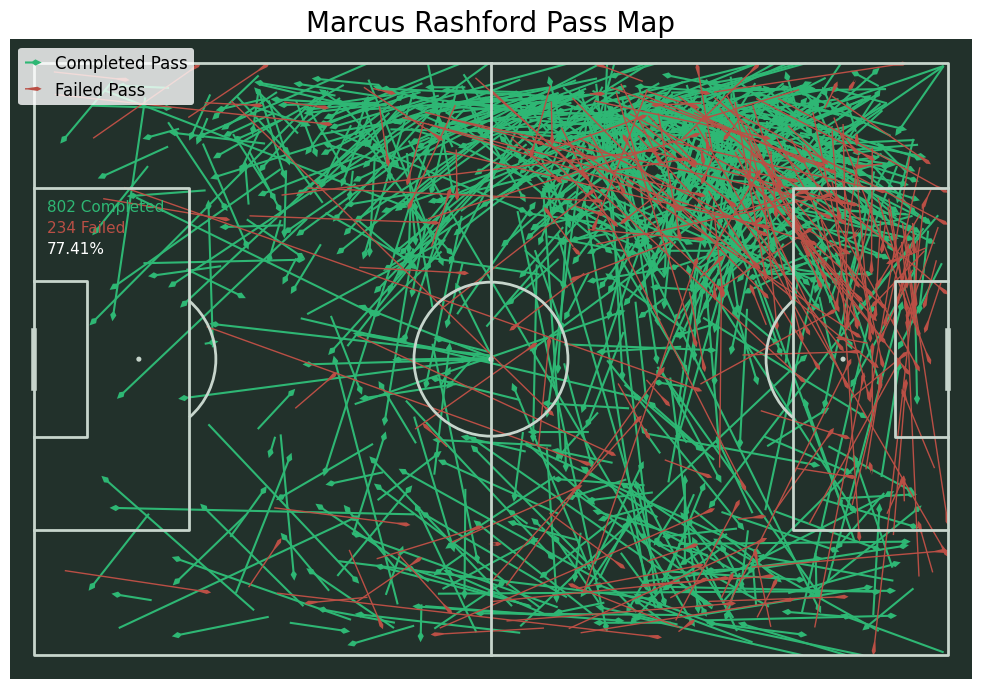

In [ ]:
# Set up the pitch
pass_success_count = len(pass_success.index)
pass_fail_count = len(pass_fail.index)
pass_rate = round(pass_success_count/(pass_success_count + pass_fail_count) *100,2)
pitch = Pitch(pitch_type='opta', half=False, line_zorder=2,pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(12, 7))
#fig.set_facecolor('#22312b')

# Plot the completed passes
pitch.arrows(pass_success.x, pass_success.y,
             pass_success.end_x, pass_success.end_y, width=1.5,
             headwidth=3, headlength=3, color='#2eb774', ax=ax, label='Completed Pass')

# Plot the other passes
pitch.arrows(pass_fail.x, pass_fail.y,
             pass_fail.end_x, pass_fail.end_y, width=1,
             headwidth=3, headlength=3, headaxislength=10,
             color='#ba4f45', ax=ax, label='Failed Pass')

# Set up the legend
ax.legend(facecolor='white', handlelength=1, edgecolor='None', fontsize=12, loc='upper left')
fig.text(0.13, 0.69, f'{pass_success_count} Completed', ha='left', va='baseline', fontsize=11, color='#2eb774')
fig.text(0.13, 0.66, f'{pass_fail_count} Failed', ha='left', va='baseline', fontsize=11, color='#ba4f45')
fig.text(0.13, 0.63, f'{pass_rate}%', ha='left', va='baseline', fontsize=11, color='white')
# Set the title
ax_title = ax.set_title(f'{playerName} Pass Map', fontsize=20)

### Progressive Pass Map

Text(0.13, 0.63, '62.01%')

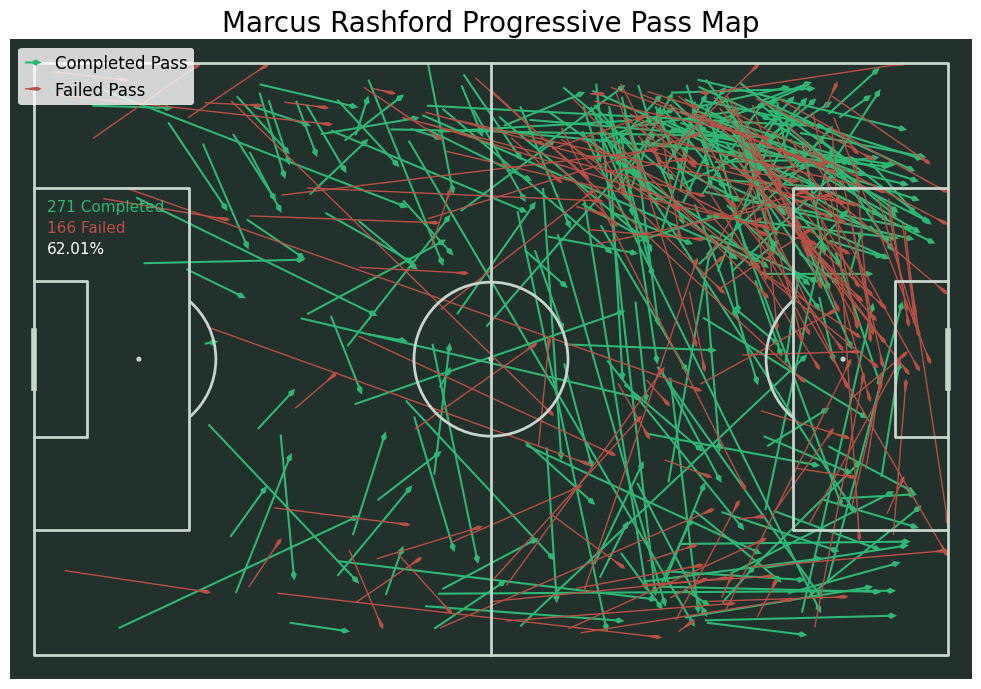

In [ ]:
# Set up the pitch
progressive_pass_success_count = len(progressive_pass_success.index)
progressive_pass_fail_count = len(progressive_pass_fail.index)
progressive_pass_rate = round(progressive_pass_success_count/(progressive_pass_success_count + progressive_pass_fail_count) *100,2)
pitch = Pitch(pitch_type='opta', half=False, line_zorder=2,pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(12, 7))
#fig.set_facecolor('#22312b')

# Plot the completed passes
pitch.arrows(progressive_pass_success.x, progressive_pass_success.y,
             progressive_pass_success.end_x, progressive_pass_success.end_y, width=1.5,
             headwidth=3, headlength=3, color='#2eb774', ax=ax, label='Completed Pass')

# Plot the other passes
pitch.arrows(progressive_pass_fail.x, progressive_pass_fail.y,
             progressive_pass_fail.end_x, progressive_pass_fail.end_y, width=1,
             headwidth=3, headlength=3, headaxislength=10,
             color='#ba4f45', ax=ax, label='Failed Pass')

# Set up the legend
ax.legend(facecolor='white', handlelength=1, edgecolor='None', fontsize=12, loc='upper left')

# Set the title
ax_title = ax.set_title(f'{playerName} Progressive Pass Map', fontsize=20)
fig.text(0.13, 0.69, f'{progressive_pass_success_count} Completed', ha='left', va='baseline', fontsize=11, color='#2eb774')
fig.text(0.13, 0.66, f'{progressive_pass_fail_count} Failed', ha='left', va='baseline', fontsize=11, color='#ba4f45')
fig.text(0.13, 0.63, f'{progressive_pass_rate}%', ha='left', va='baseline', fontsize=11, color='white')
#ax.text(f'{len(progressive_pass_success.index)} Successful\n{len(progressive_pass_fail.index)} Unsuccessful')


## Plot Receive Pass

In [ ]:
receive_pass = mu_events.loc[mu_events.pass_recipient_name==f'{playerName}'].reset_index(drop=True)
receive_pass

,id,event_id,minute,second,team_id,x,y,expanded_minute,satisfied_events_types,is_touch,period_value,period_display_name,type_value,type_display_name,outcome_type_value,outcome_type_display_name,player_id,end_x,end_y,related_event_id,related_player_id,blocked_x,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,card_type_value,cardType.displayName,is_goal,match_id,is_own_goal,player_name,Cross,JerseyNumber,RelatedEventId,Offensive,Throughball,LeadingToAttempt,KeyPass,IndirectFreekickTaken,LowCentre,TeamFormation,IntentionalGoalAssist,GoalMouthY,OutOfBoxDeepRight,VoidYellowCard,MissLeft,Assisted,OneOnOne,FormationSlot,PenaltyShootoutConcededGK,Volley,BigChance,FromShotOffTarget,OtherBodyPart,DeepBoxLeft,BoxLeft,FreekickTaken,Chipped,PlayerPosition,KeeperThrow,DeepBoxRight,StandingSave,Feet,Longball,CornerTaken,FastBreak,KeeperWentWide,BlockedY,HighRight,RegularPlay,KeeperSaveInSixYard,Penalty,Head,OutfielderBlock,KeeperMissed,PassEndX,MissHigh,HeadPass,PassEndY,BlockedX,KeeperSaved,SmallBoxRight,Blocked,IntentionalAssist,BoxCentre,Defensive,OutOfBoxCentre,Foul,BigChanceCreated,LayOff,ThrowIn,Collected,BoxRight,OutOfBoxDeepLeft,FirstTouch,Red,GoalKick,ShotAssist,GoalMouthZ,Hands,HighLeft,KeeperSaveInTheBox,Length,ParriedSafe,ThirtyFivePlusCentre,SmallBoxCentre,SavedOffline,PlayerCaughtOffside,BlockedCross,LowRight,LeftFoot,Yellow,SecondYellow,RightFoot,OutOfBoxRight,OppositeRelatedEvent,OwnGoal,KeeperSaveObox,LastMan,HighCentre,ParriedDanger,HighClaim,SetPiece,Zone,FromCorner,SmallBoxLeft,AerialFoul,OverRun,LowLeft,ThirtyFivePlusLeft,DirectFreekick,Angle,MissRight,DivingSave,ThrowinSetPiece,GoalDisallowed,CaptainPlayerId,TeamPlayerFormation,SixYardBlock,InvolvedPlayers,LeadingToGoal,IndividualPlay,pass_recipient_name,pass_recipient_id
0,2.577372e+09,105,10,43.0,32,74.6,28.6,10,"[91, 119, 117, 30, 123, 205, 40, 46, 36, 38, 217, 218]",True,1,FirstHalf,1,Pass,1,Successful,364315.0,89.2,27.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Antony,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.2,NaN,NaN,27.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcus Rashford,300299.0
1,2.577374e+09,157,15,31.0,32,20.2,21.9,15,"[91, 117, 30, 36, 38, 215, 218]",True,1,FirstHalf,1,Pass,1,Successful,331924.0,29.6,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Aaron Wan-Bissaka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6,NaN,NaN,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcus Rashford,300299.0
2,2.577377e+09,210,20,38.0,32,25.7,39.7,20,"[91, 117, 30, 36, 37, 216, 218]",True,1,FirstHalf,1,Pass,1,Successful,88526.0,37.8,45.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Casemiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.8,NaN,NaN,45.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcus Rashford,300299.0
3,2.577385e+09,336,35,10.0,32,34.3,68.1,35,"[91, 117, 30, 36, 38, 216, 218]",True,1,FirstHalf,1,Pass,1,Successful,340105.0,45.5,64.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Lisandro Martínez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

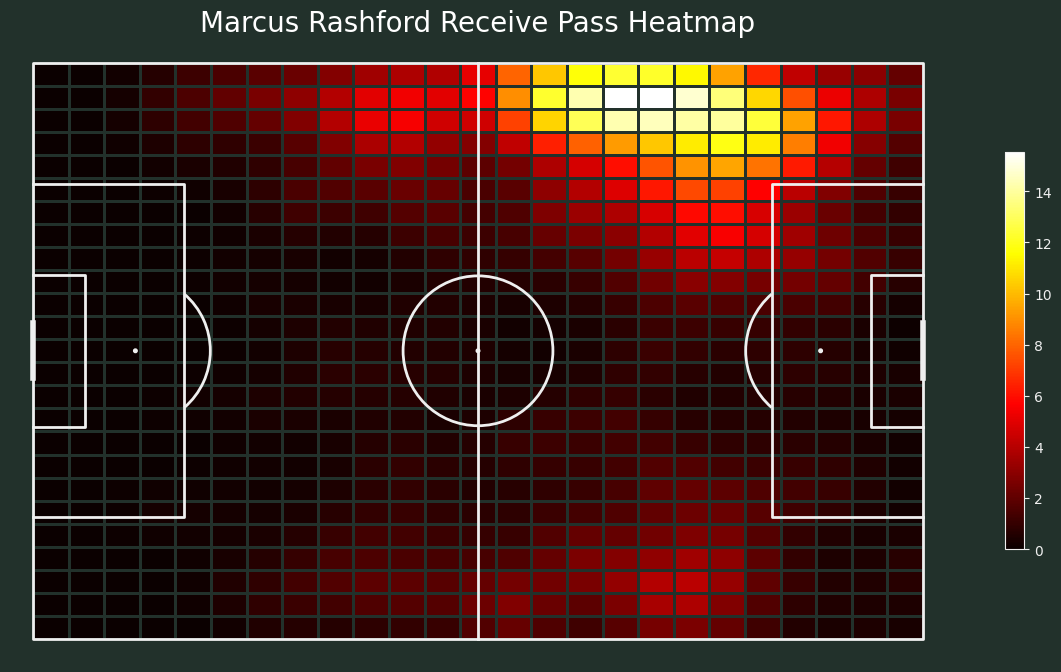

In [ ]:
from scipy.ndimage import gaussian_filter

pitch = Pitch(pitch_type='opta', half=False, line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
fig, ax = pitch.draw(figsize=(12, 7))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(receive_pass.end_x, receive_pass.end_y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
#pitch.heatmap(receive_pass.end_x, receive_pass.end_y, s=30, c = 'Green', ax=ax,edgecolors="black")

cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
ax_title = ax.set_title(f'{playerName} Receive Pass Heatmap', fontsize=20,color='white')
#ax.title('Shot')
plt.show()

## Shots Map

In [ ]:
player_events = mu_events.loc[mu_events.player_name==f'{playerName}'].reset_index(drop=True)
player_events

,id,event_id,minute,second,team_id,x,y,expanded_minute,satisfied_events_types,is_touch,period_value,period_display_name,type_value,type_display_name,outcome_type_value,outcome_type_display_name,player_id,end_x,end_y,related_event_id,related_player_id,blocked_x,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,card_type_value,cardType.displayName,is_goal,match_id,is_own_goal,player_name,Cross,JerseyNumber,RelatedEventId,Offensive,Throughball,LeadingToAttempt,KeyPass,IndirectFreekickTaken,LowCentre,TeamFormation,IntentionalGoalAssist,GoalMouthY,OutOfBoxDeepRight,VoidYellowCard,MissLeft,Assisted,OneOnOne,FormationSlot,PenaltyShootoutConcededGK,Volley,BigChance,FromShotOffTarget,OtherBodyPart,DeepBoxLeft,BoxLeft,FreekickTaken,Chipped,PlayerPosition,KeeperThrow,DeepBoxRight,StandingSave,Feet,Longball,CornerTaken,FastBreak,KeeperWentWide,BlockedY,HighRight,RegularPlay,KeeperSaveInSixYard,Penalty,Head,OutfielderBlock,KeeperMissed,PassEndX,MissHigh,HeadPass,PassEndY,BlockedX,KeeperSaved,SmallBoxRight,Blocked,IntentionalAssist,BoxCentre,Defensive,OutOfBoxCentre,Foul,BigChanceCreated,LayOff,ThrowIn,Collected,BoxRight,OutOfBoxDeepLeft,FirstTouch,Red,GoalKick,ShotAssist,GoalMouthZ,Hands,HighLeft,KeeperSaveInTheBox,Length,ParriedSafe,ThirtyFivePlusCentre,SmallBoxCentre,SavedOffline,PlayerCaughtOffside,BlockedCross,LowRight,LeftFoot,Yellow,SecondYellow,RightFoot,OutOfBoxRight,OppositeRelatedEvent,OwnGoal,KeeperSaveObox,LastMan,HighCentre,ParriedDanger,HighClaim,SetPiece,Zone,FromCorner,SmallBoxLeft,AerialFoul,OverRun,LowLeft,ThirtyFivePlusLeft,DirectFreekick,Angle,MissRight,DivingSave,ThrowinSetPiece,GoalDisallowed,CaptainPlayerId,TeamPlayerFormation,SixYardBlock,InvolvedPlayers,LeadingToGoal,IndividualPlay,pass_recipient_name,pass_recipient_id
0,2.577372e+09,106,10,45.0,32,88.8,30.1,10,"[91, 9, 10, 1, 3, 12]",True,1,FirstHalf,15,SavedShot,1,Successful,300299.0,NaN,NaN,105.0,364315.0,92.3,37.2,4.4,47.1,True,NaN,NaN,NaN,1,NaN,Marcus Rashford,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.577374e+09,158,15,32.0,32,29.5,8.3,15,"[91, 117, 30, 35, 37, 215, 218]",True,1,FirstHalf,1,Pass,1,Successful,300299.0,18.2,25.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Marcus Rashford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,25.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casemiro,88526.0
2,2.577374e+09,165,16,1.0,32,43.2,18.8,16,"[91, 60]",True,1,FirstHalf,74,BlockedPass,1,Successful,300299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Marcus Rashford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.577377e+09,211,20,42.0,32,49.5,55.5,20,"[91, 119, 117, 30, 205, 36, 37, 217, 218]",True,1,FirstHalf,1,Pass,1,Successful,300299.0,68.0,88.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Marcus Rashford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
filter_event = player_events.loc[player_events['period_display_name']!='PenaltyShootout'].reset_index(drop=True)
shot_goal = filter_event.loc[filter_event['type_display_name']=="Goal"].reset_index(drop=True)
saved_shot = filter_event.loc[filter_event['type_display_name']=="SavedShot"].reset_index(drop=True)
missed_shot = filter_event.loc[filter_event['type_display_name']=="MissedShots"].reset_index(drop=True)


Text(0.28, 0.6, '9.41% Conversion Rate')

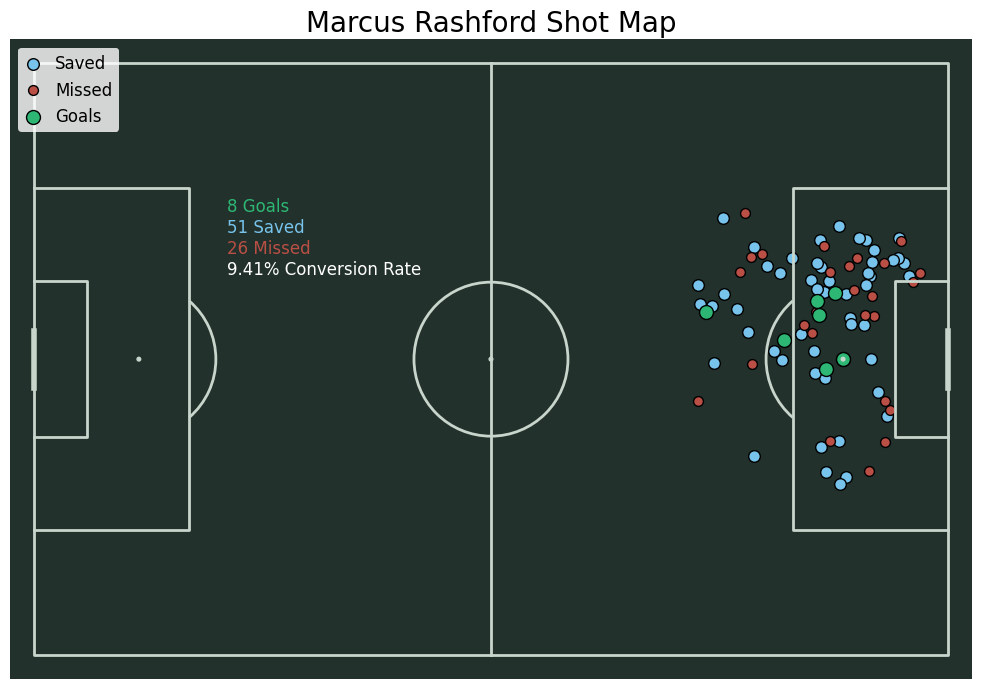

In [ ]:
# Set up the pitch
goal_count = len(shot_goal.index)
saved_shot_count = len(saved_shot.index)
missed_shot_count = len(missed_shot.index)
shots_count = goal_count + saved_shot_count + missed_shot_count
shot_rate = round(goal_count/shots_count *100,2)
pitch = Pitch(pitch_type='opta', half=False, line_zorder=2,pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(12, 7))
#fig.set_facecolor('#22312b')

pitch.scatter(saved_shot.x, saved_shot.y, s=70, c = '#77c3ec', ax=ax,edgecolors="black",label='Saved')
pitch.scatter(missed_shot.x, missed_shot.y, s=50, c = '#ba4f45', ax=ax,edgecolors="black",label='Missed')
pitch.scatter(shot_goal.x, shot_goal.y, s=100, c = '#2eb774', ax=ax,edgecolors="black",label='Goals')

# Set up the legend
ax.legend(facecolor='white', handlelength=1, edgecolor='None', fontsize=12, loc='upper left')

# Set the title
ax_title = ax.set_title(f'{playerName} Shot Map', fontsize=20)
fig.text(0.28, 0.69, f'{goal_count} Goals', ha='left', va='baseline', fontsize=12, color='#2eb774')
fig.text(0.28, 0.66, f'{saved_shot_count} Saved', ha='left', va='baseline', fontsize=12, color='#77c3ec')
fig.text(0.28, 0.63, f'{missed_shot_count} Missed', ha='left', va='baseline', fontsize=12, color='#ba4f45')
fig.text(0.28, 0.60, f'{shot_rate}% Conversion Rate', ha='left', va='baseline', fontsize=12, color='white')
#ax.text(f'{len(progressive_pass_success.index)} Successful\n{len(progressive_pass_fail.index)} Unsuccessful')
